In [1]:
#test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import timedelta



/tmp/ipykernel_5315/3038618126.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# get the correct calander days of the 

start_date = datetime(2024,2,16).date()
today_date = datetime.today().date()

#print(start_date, today_date)

count_days = today_date - start_date                        #  To rediuce day from calculation :    -timedelta(days=1)

print("We have T&H data of last",count_days.days,"days.")       

date_x = start_date

# correcly get all the days in the calander
for x in range(0,count_days.days,):
    print(date_x)
    date_x = date_x + timedelta(days=1)




We have T&H data of last 15 days.
2024-02-16
2024-02-17
2024-02-18
2024-02-19
2024-02-20
2024-02-21
2024-02-22
2024-02-23
2024-02-24
2024-02-25
2024-02-26
2024-02-27
2024-02-28
2024-02-29
2024-03-01


In [8]:
# create full dateset and collect date 
selected_date = datetime(2024,2,16).date()


# convert string pandas array to intiger np array 

file_parth = '/home/malithjkd/Documents/'+ selected_date.strftime("%Y%m%d"+".txt")

row_df = pd.read_csv(file_parth,header=None)    # cannot load strings to numpy 
#headers = ['Hour','Min','Temparature','Humidity']
#row_df.columns = headers
#row_df
row_np = row_df.values

# get full date np array for plotting pourpose
full_data = np.zeros((1440,6))
count = 0
for h in range(0,24):
    for m in range (0,60):
        full_data[count,0] = count
        full_data[count,1] = h
        full_data[count,2] = m
        count = count +1
        


x = 0
y = 0
for x in range (0,1440):
    if full_data[x,1] == row_np[y,0] and full_data[x,2] == row_np[y,1]:       # maching hours and min
        full_data[x,3] = row_np[y,2]
        full_data[x,4] = row_np[y,3]
        y = y+1
    # Crating synthatic data points to remove null points
    if full_data[x,3] == 0 :
        full_data[x,3] = full_data[x-1,3]
        full_data[x,5] = 1
    
    if full_data[x,4] == 0 :
        full_data[x,4] = full_data[x-1,4]
        full_data[x,5] = 1
    


TypeError: 'tuple' object is not callable

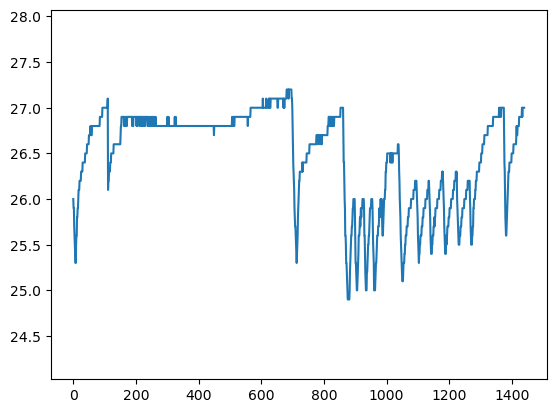

In [119]:
plt.plot(full_data[:,0],full_data[:,3])
# Get the current y-axis limits
current_ylim = plt.ylim()

# Calculate the new y-axis limits (30% up and down)
new_ylim = (current_ylim[0] - 0.3 * (current_ylim[1] - current_ylim[0]),
            current_ylim[1] + 0.3 * (current_ylim[1] - current_ylim[0]))

# Set the new y-axis limits
plt.ylim(new_ylim)

plt.show()

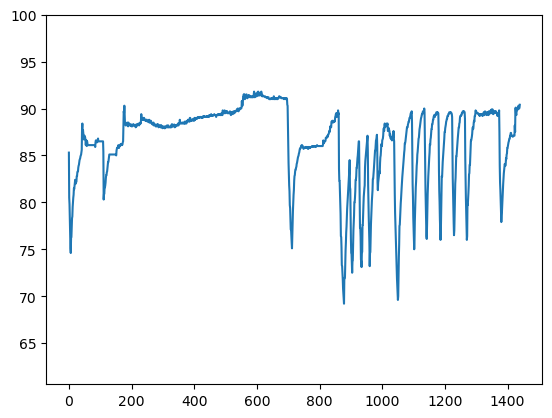

In [120]:
plt.plot(full_data[:,0],full_data[:,4])



# Get the current y-axis limits
current_ylim = plt.ylim()
# Calculate the new y-axis limits (20% up and down)
new_ylim = (current_ylim[0] - 0.3 * (current_ylim[1] - current_ylim[0]), min(current_ylim[1] + 0.3 * (current_ylim[1] - current_ylim[0]),100))


# Set the new y-axis limits
plt.ylim(new_ylim)
plt.show()

In [6]:
plt.plot(full_data[count,0],row_df[:,2])
plt.show()

IndexError: index 1440 is out of bounds for axis 0 with size 1440